In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Data exploration and cleanup

- All of the below data was taken from https://fred.stlouisfed.org/.

- The data was downloaded as excel files, converted to csv and read in for manipulation and cleanup. 

- This dataset came simple and clean so there was little cleanup to do other then format the date into
a timeframe that looked presentable on a line graph.

In [2]:
total_vehicle_sales = pd.read_csv('C:/Users/idriv/OneDrive/Desktop/Impact_Vehicule_COVID-19/project1data/total_vehicle_sales.csv')
sales_in_dollars = pd.read_csv('C:/Users/idriv/OneDrive/Desktop/Impact_Vehicule_COVID-19/project1data/total_vehicle_sales_in_dollars.csv')
consumer_price_index = pd.read_csv('C:/Users/idriv/OneDrive/Desktop/Impact_Vehicule_COVID-19/project1data/consumer_price_index.csv')
auto_inventories = pd.read_csv('C:/Users/idriv/OneDrive/Desktop/Impact_Vehicule_COVID-19/project1data/auto_inventories.csv')


In [3]:
def bar_graph(csvpath = '', 
              setIndex =  '', 
              plotKind = '' , 
              saveFigure = '', 
              ylabel = '',   
              title = '',
              color = ''):
    
    df = pd.read_csv(f"{csvpath}")

    df.set_index(setIndex, inplace=True)
    df.plot(kind=plotKind, linewidth=3, figsize=(20,10), color=color)
    plt.ylabel(ylabel, fontweight="bold", fontsize = 20)
    plt.xlabel("")
    plt.axvline(x = 2, color = 'red', linewidth = 3, linestyle = "--", label = 'Lockdowns Instituted (Mar 2020)')
    plt.axvline(x = 4, color = 'green', linewidth = 3, linestyle = "--", label = 'Phased Reopenings Began (May 2020)')
    plt.axvline(x = 6, color = 'purple', linewidth = 3,linestyle = "--", label = 'Heals Act Signed (July 2020)')
    plt.axvline(x = 8, color = 'black', linewidth = 3,linestyle = "--", label = 'Chip Shortage begins (Sep 2020)')

    plt.xticks(rotation=90, fontsize=15, fontweight="bold")
    plt.yticks(fontsize=15)
    plt.title(title, fontweight="bold", fontsize=20)
    plt.legend(fontsize=15)

    plt.savefig(saveFigure)

    plt.show()

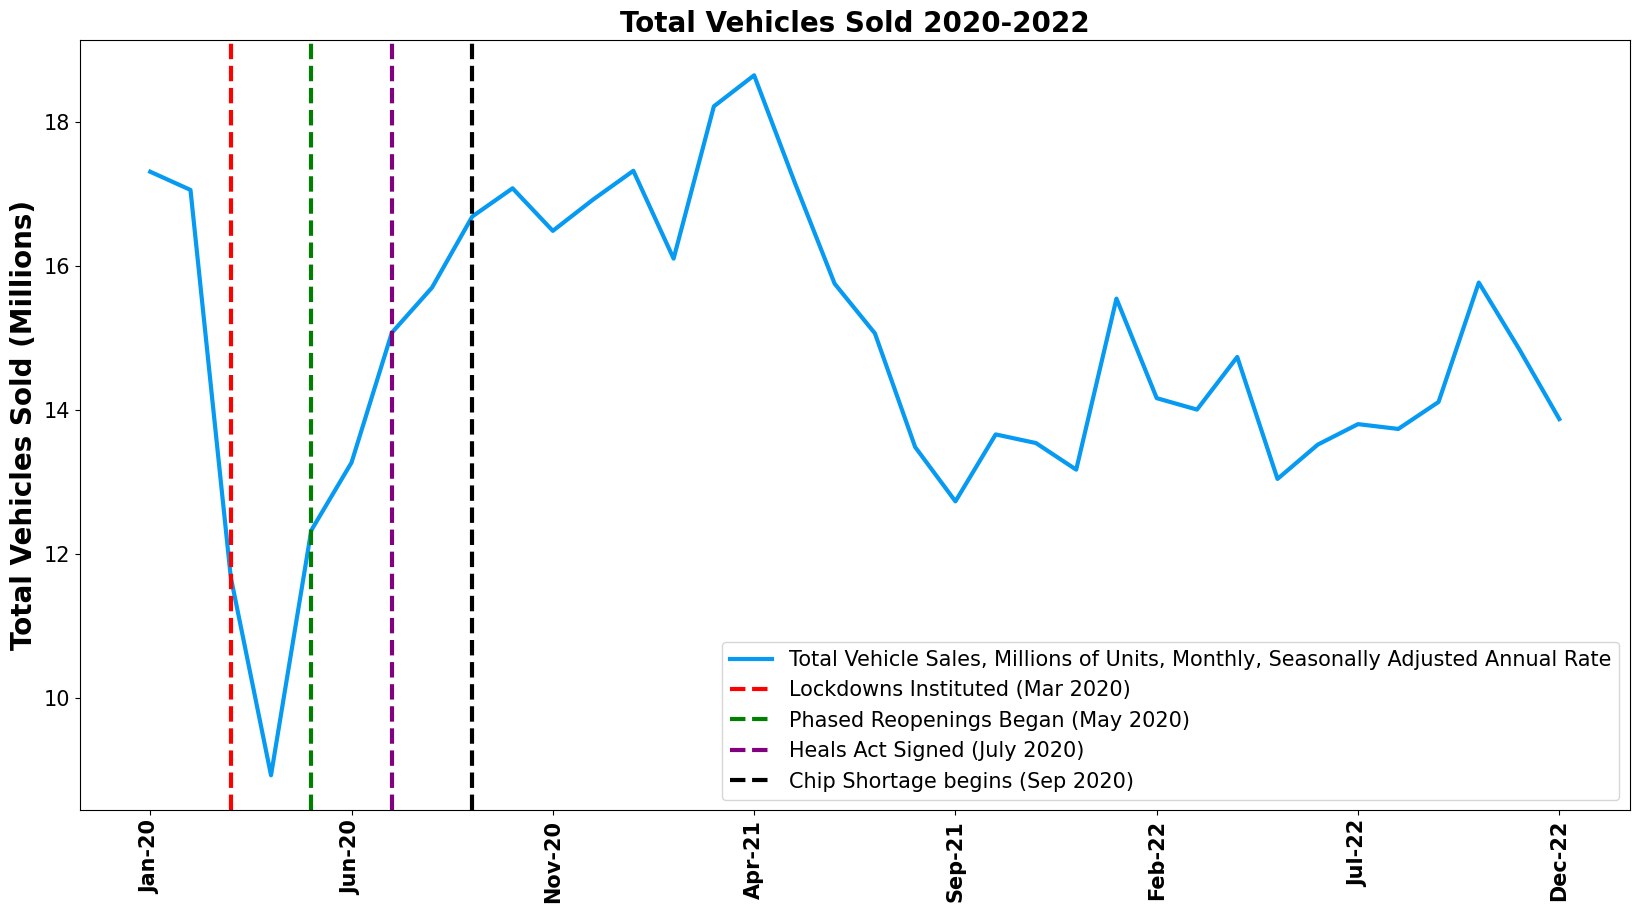

In [4]:
bar_graph('C:/Users/idriv/OneDrive/Desktop/Impact_Vehicule_COVID-19/project1data/total_vehicle_sales.csv',
         'observation_date',
          'line',
          'total_vehicle_sales.png',
          'Total Vehicles Sold (Millions)',
          'Total Vehicles Sold 2020-2022',
          '#069AF3'
         )

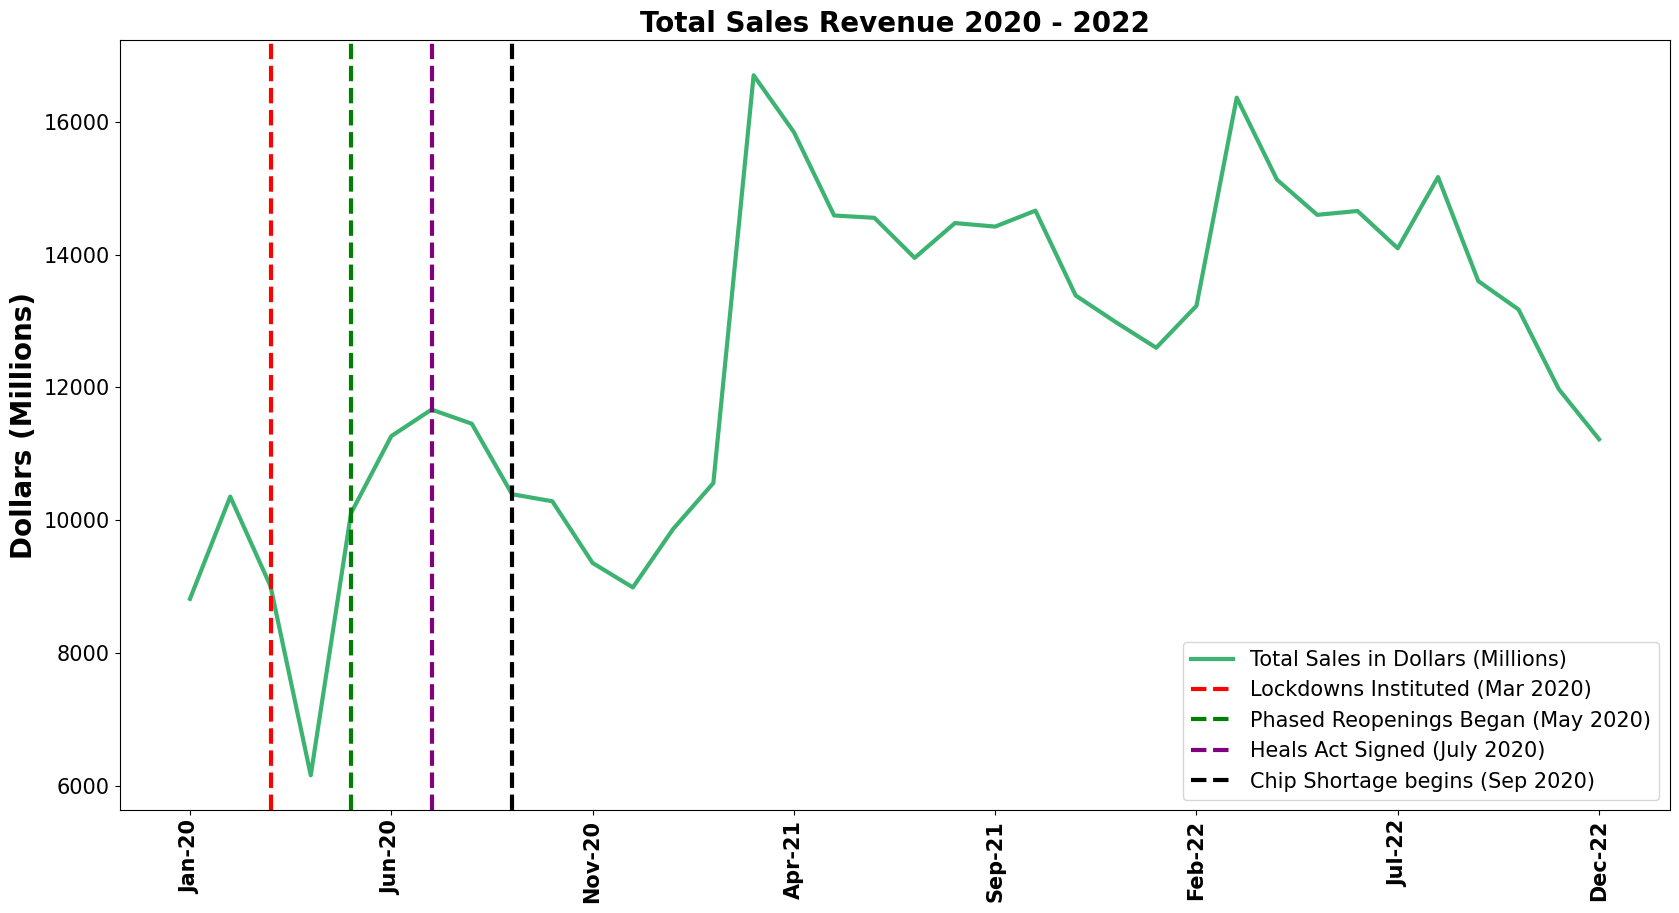

In [5]:
bar_graph('C:/Users/idriv/OneDrive/Desktop/Impact_Vehicule_COVID-19/project1data/total_vehicle_sales_in_dollars.csv',
          'observation_date',
          'line',
          'total_sales_rev.png',
          'Dollars (Millions)',
          'Total Sales Revenue 2020 - 2022',
          'mediumseagreen'
         )


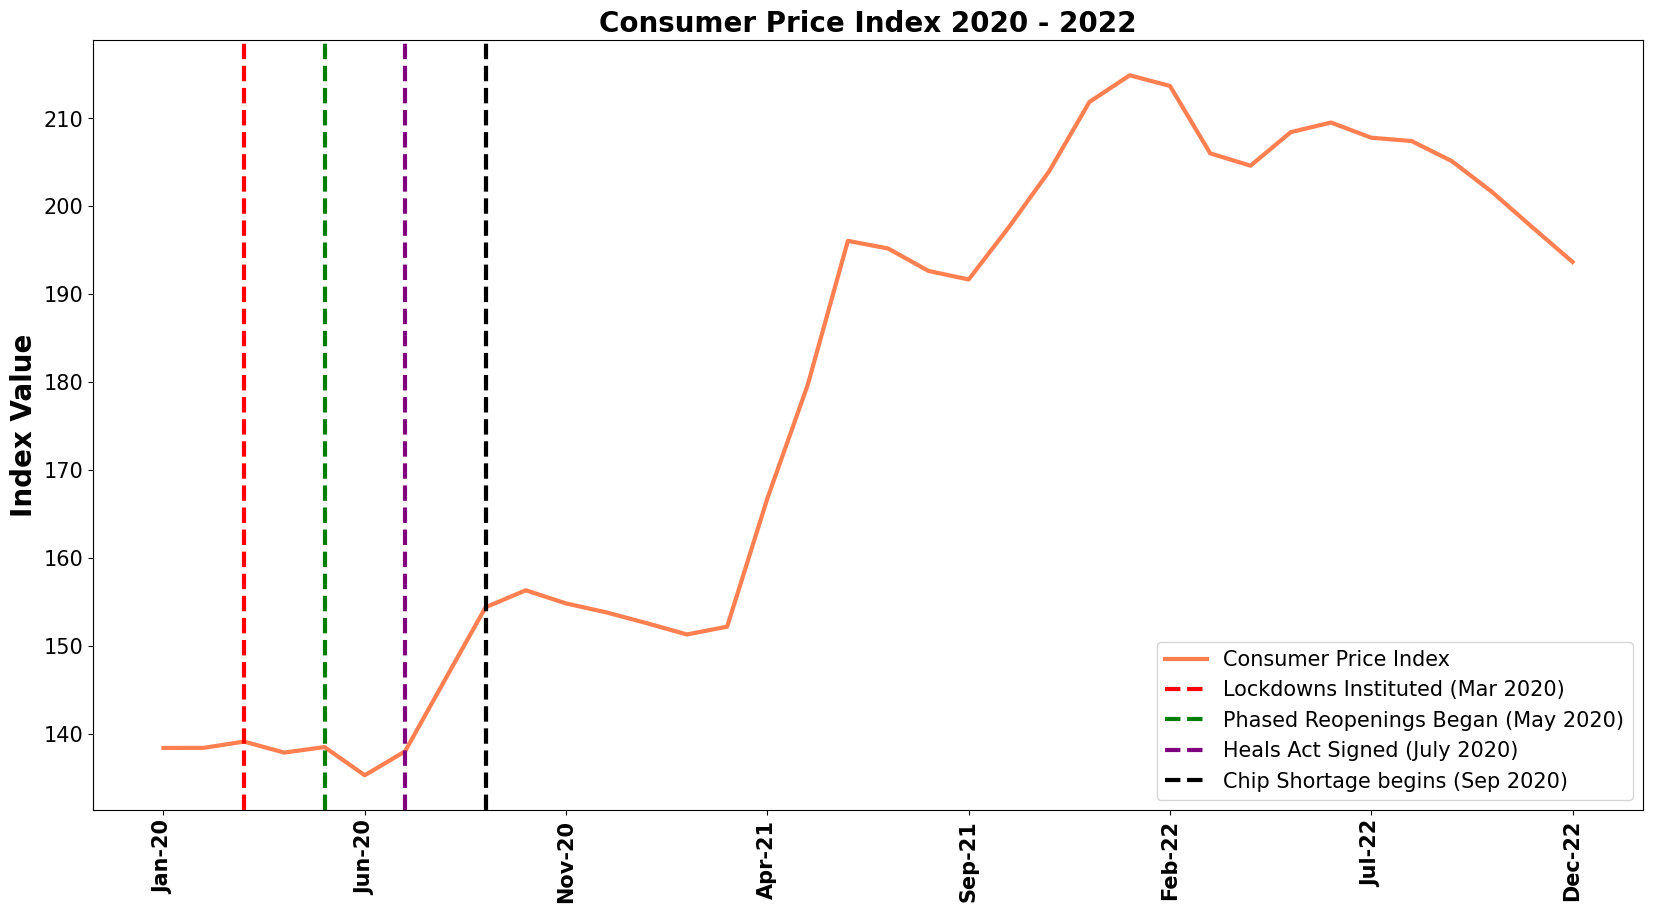

In [6]:
bar_graph('C:/Users/idriv/OneDrive/Desktop/Impact_Vehicule_COVID-19/project1data/consumer_price_index.csv',
          'observation_date',
          'line',
          'consumer_price_index.png',
          'Index Value',
          'Consumer Price Index 2020 - 2022',
          'coral'
         )



# The Consumer Price Index

- The Consumer Price Index (CPI) is a measure of the average change over time in the 
prices paid by consumers for a market basket of consumer goods and services. 

- What it does is help us see if the prices for things we buy are going up or down. In other words, is cost going up or down.

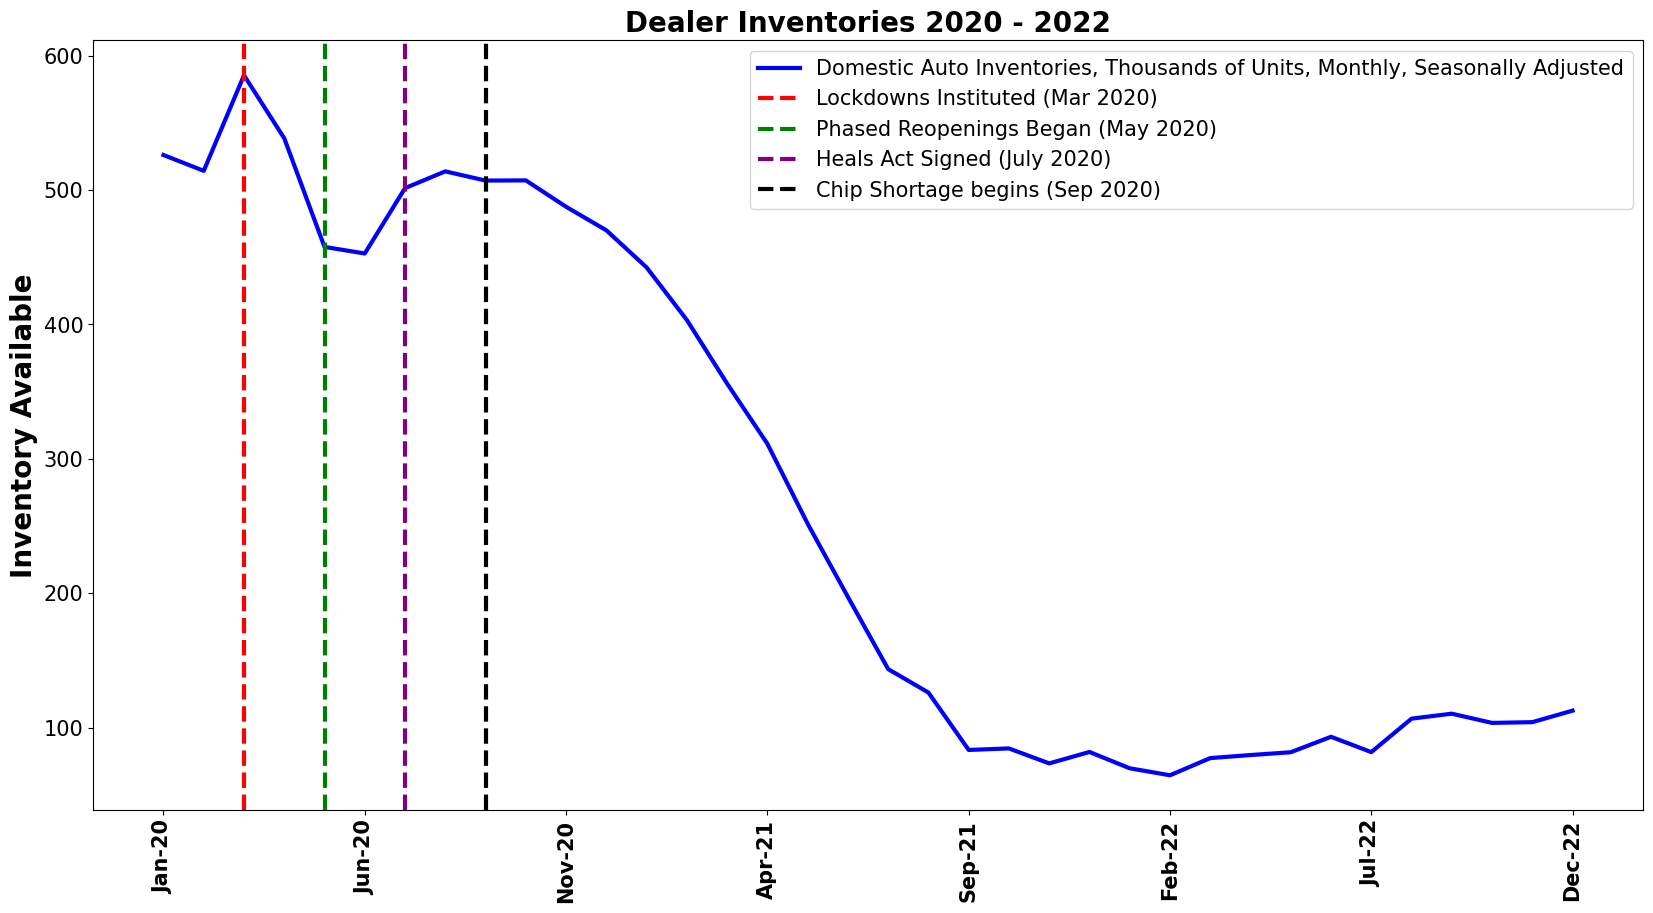

In [7]:
bar_graph('C:/Users/idriv/OneDrive/Desktop/Impact_Vehicule_COVID-19/project1data/auto_inventories.csv',
          'observation_date',
          'line',
          'dealer_inventories.png',
          'Inventory Available',
          'Dealer Inventories 2020 - 2022',
          'blue'
          )



# How did the COVID-19 pandemic affect vehicle sales?

- After sorting through all the data it's interesting to note that while total sales volume in the form of "units sold"
had an initial drastic decline which happened at the beginning of the pandemic and once lockdowns where instated, it rebounded very rapidly back to pre-pandemic levels.
- Starting in April of 2021, the number of units sold actually decreased, while the total revenue on those sales increased substantially. You'll notice that in Nov of 2020 there were almost 17M units sold that generated about 9 billion dollars in revenue.
- From Nov 2020 to April 2021, Units sold remained relatively stable and flat while revenue soared to near 17 billion dollars on the same volume of cars sold.
- Around this same time the CPI index rose dramatically, and dealer inventory levels fell off the map. Meaning, inflation skyrocketed as the supply & demand became out of balance. Was this all due to Covid-19? That is difficult to say with 100% certainty as there are many variables at play. One thing that seems certain from this data is that the chip shortage played a very large role in inventory levels declining, which led to low supply levels, while at the same time stimulus check were being distributed nationwide so people had extra money in there pockets they would not have otherwise had, which caused demand to soar at the same time supply levels were declining. So while Covid-19 itself may not have effected vehicle sales, the response to it in the form of stimulus checks played a key role in values and overall inflation soaring, as seen in the CPI.

In [8]:
sales_initial_value = total_vehicle_sales["Total Vehicle Sales, Millions of Units, Monthly, Seasonally Adjusted Annual Rate"][0]
sales_final_value = total_vehicle_sales["Total Vehicle Sales, Millions of Units, Monthly, Seasonally Adjusted Annual Rate"][35]
sales_decline = ((sales_initial_value - sales_final_value) / sales_initial_value) * 100
percentage_decline = "{:.0f}%".format(sales_decline)

rev_initial_value = sales_in_dollars["Total Sales in Dollars (Millions)"][0]
rev_final_value = sales_in_dollars["Total Sales in Dollars (Millions)"][35]
rev_gains = ((rev_final_value - rev_initial_value) / rev_initial_value) * 100
rev_percentage_gain = "{:.0f}%".format(rev_gains)

cpi_initial_value = consumer_price_index["Consumer Price Index"][0]
cpi_final_value = consumer_price_index["Consumer Price Index"][35]
cpi_gains = ((cpi_final_value - cpi_initial_value) / cpi_initial_value) * 100
cpi_percentage_gain = "{:.0f}%".format(cpi_gains)

inventory_initial_value = auto_inventories["Domestic Auto Inventories, Thousands of Units, Monthly, Seasonally Adjusted"][0]
inventory_final_value = auto_inventories["Domestic Auto Inventories, Thousands of Units, Monthly, Seasonally Adjusted"][35]
inventory_decline = ((inventory_initial_value - inventory_final_value) / inventory_initial_value) * 100
inventory_percentage_decline = "{:.0f}%".format(inventory_decline)

print(f"Sales(units) Decline from Jan 2020 to Dec 2022:", percentage_decline)
print(f"Sales Revenue Increase from Jan 2020 to Dec 2022:", rev_percentage_gain)
print(f"Consumer Price Index Increase from Jan 2020 to Dec 2022:", cpi_percentage_gain)
print(f"Auto Inventories Decline from Jan 2020 to Dec 2022:", inventory_percentage_decline)



Sales(units) Decline from Jan 2020 to Dec 2022: 20%
Sales Revenue Increase from Jan 2020 to Dec 2022: 27%
Consumer Price Index Increase from Jan 2020 to Dec 2022: 40%
Auto Inventories Decline from Jan 2020 to Dec 2022: 79%


# Numerical Analysis:

- Between Jan 2020 and Dec 2022: 
    - Inventory levels saw a 79% decline .
    - CPI rose 40%
    - Total Revenue rose 27%
    - Total Sales Volume declined 20%